### Regresión Matriz de indicadores

REGRESION SIMPLE

In [74]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

In [75]:
matriz = pd.read_excel(r'C:\Users\eangenello\Desktop\Indicadores Matriz de Riesgo (1).xlsx')

In [76]:
matriz = matriz.fillna(0)

In [77]:
# Quito indicadores que no se calculan para AUTOMOTORES (26, 33, 40)

indicadores = matriz[['Cod Cia', 'DenominacionCorta','periodo','ind_01',
       'ind_02', 'ind_03', 'ind_04', 'ind_05', 'ind_06', 'ind_08', 'ind_09',
       'ind_10', 'ind_11', 'ind_12', 'ind_13', 'ind_14', 'ind_15', 'ind_16',
       'ind_17', 'ind_18', 'ind_19', 'ind_20', 'ind_21', 'ind_22', 'ind_23',
       'ind_24', 'ind_25', 'ind_27', 'ind_28', 'ind_29', 'ind_30',
       'ind_31', 'ind_32', 'ind_34', 'ind_35', 'ind_36', 'ind_37',
       'ind_38', 'ind_39', 'ind_41', 'ind_42', 'ind_43']].copy()

In [78]:
ind_2019_1 = indicadores.drop(indicadores[indicadores['periodo'] != '2019-1'].index).copy()
ind_2019_1 = ind_2019_1.drop({'periodo'},1)
ind_2019_1 = ind_2019_1[(ind_2019_1['Cod Cia']!=389)&(ind_2019_1['Cod Cia']!=858)&(ind_2019_1['Cod Cia']!=241)]

ind_2019_2 = indicadores.drop(indicadores[indicadores['periodo'] != '2019-2'].index).copy()
ind_2019_2 = ind_2019_2.drop({'periodo'},1)

In [82]:
Q1 =  ind_2019_1['ind_27'].quantile(0.25)
Q3 = ind_2019_1['ind_27'].quantile(0.75)
IQR1 = Q3 - Q1

ind_2019_1_CM1=ind_2019_1[['ind_27','DenominacionCorta']].copy()
ind_2019_1_CM1= ind_2019_1[(ind_2019_1['ind_27'] < Q1-1.5*IQR1 ) | (ind_2019_1['ind_27'] > Q3+1.5*IQR1)]
print(ind_2019_1_CM1[['ind_27','DenominacionCorta']])

        ind_27 DenominacionCorta
1245  0.242565           BERKLEY


C:\Users\eangenello\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


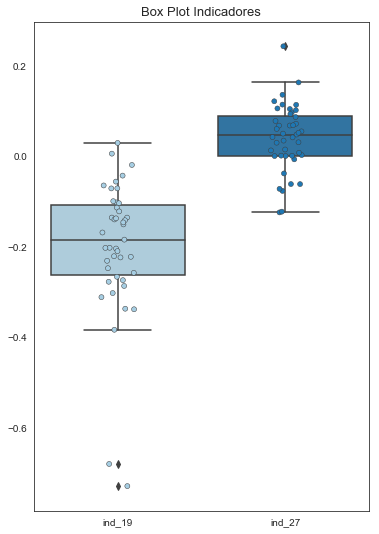

In [83]:
sns.set_style('white')
pal=sns.color_palette('Paired')

plt.rc("figure", figsize=(6, 9))
plt.title('Box Plot Indicadores', fontsize = 13)

ax1 = sns.boxplot(data=ind_2019_1[['ind_19', 'ind_27']], palette=pal)
ax2 = sns.stripplot(data=ind_2019_1[['ind_19', 'ind_27']], jitter=True, split=True, linewidth=0.5, palette=pal)
plt.show()

In [85]:
lm = smf.ols(formula='ind_19~ind_27', data=ind_2019_1).fit()

In [86]:
lm.params

Intercept   -0.225621
ind_27       0.640155
dtype: float64

In [87]:
lm.pvalues

Intercept    2.465744e-11
ind_27       3.832867e-02
dtype: float64

In [88]:
print(lm.rsquared)
print(lm.rsquared_adj)

0.10049945847054231
0.07856042087226289


In [89]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ind_19   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     4.581
Date:                Mon, 07 Oct 2019   Prob (F-statistic):             0.0383
Time:                        14:46:58   Log-Likelihood:                 23.724
No. Observations:                  43   AIC:                            -43.45
Df Residuals:                      41   BIC:                            -39.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2256      0.025     -9.058      0.000      -0.276      -0.175
ind_27         0.6402      0.299      2.140      0.038       0.036       1.244
==============================================================================
Omnibus:                       20.652   Durbin-Watson:                   2.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.139
Skew:                          -1.386   Prob(JB):                     6.37e-08
Kurtosis:                       6.289   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
ind_19_pred = lm.predict(pd.DataFrame(ind_2019_1['ind_27']))

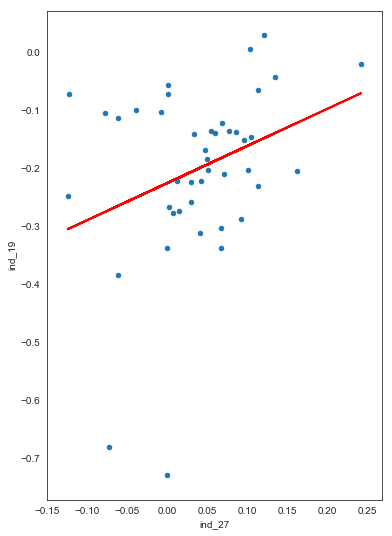

In [92]:
ind_2019_1.plot(kind = 'scatter', x='ind_27', y='ind_19')
plt.plot(pd.DataFrame(ind_2019_1['ind_27']), ind_19_pred, c='red', linewidth = 2)

In [93]:
# Agrego al dataset el cálculo del modelo línea a línea
# Utilizo los betas que me salen de la regresión

ind_2019_1['ind_19_pred']= lm.params[0] + lm.params[1] * ind_2019_1['ind_19']

In [94]:
# Agrego al dataset el error standard residual

ind_2019_1['RSE'] = (ind_2019_1['ind_19'] - ind_2019_1['ind_19_pred'])**2

In [95]:
# Suma cuadrado de las diferencias

SSD = sum(ind_2019_1['RSE'])
SSD

1.1368762434415542

In [106]:
# Error estandard residual

RSE = np.sqrt(SSD/(len(ind_2019_1)-2))
RSE

0.16651933480658682

In [107]:
ind_19_mean = -np.mean(ind_2019_1['ind_19'])
ind_19_mean 

0.19969311775143347

In [108]:
# Error promedio

error_prom = RSE/ind_19_mean 
error_prom 

0.8338761830232954

(array([ 2.,  0.,  0.,  0.,  1.,  6., 12.,  9.,  9.,  4.]),
 array([-0.03669591, -0.00941793,  0.01786005,  0.04513803,  0.072416  ,
         0.09969398,  0.12697196,  0.15424994,  0.18152791,  0.20880589,
         0.23608387]),
 <a list of 10 Patch objects>)

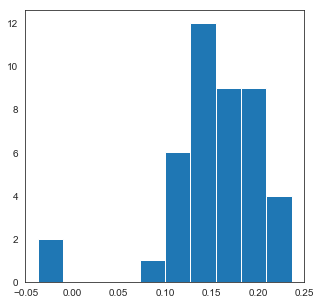

In [109]:
# Histograma de los errores: ¿Parece una normal?

plt.rc("figure", figsize=(5, 5))
plt.hist((ind_2019_1['ind_19'] - ind_2019_1['ind_19_pred']))

REGRESION MULTIPLE

In [24]:
# Añado variables de a una

lm2 = smf.ols('ind_04~ind_19+ind_20', data=ind_new).fit()

In [25]:
lm2.params

Intercept    0.241533
ind_19      -0.039663
ind_20      -0.174353
dtype: float64

In [26]:
lm2.pvalues

Intercept    3.224777e-94
ind_19       5.605936e-05
ind_20       3.253500e-10
dtype: float64

In [27]:
lm2.rsquared

0.22872211235159412

In [28]:
lm2.rsquared_adj

0.22307172489629445

In [31]:
ind_04_pred2 = lm2.predict(ind_new[['ind_19','ind_20']])
ind_04_pred2

1052    0.238904
1053    0.217282
1054    0.225648
1055    0.236747
1056    0.190350
1057    0.222387
1058    0.270624
1059    0.249856
1060    0.219894
1061    0.188361
1062    0.197570
1063    0.237642
1064    0.248031
1065    0.214128
1066    0.244088
1067    0.210984
1068    0.196330
1069    0.216158
1070    0.198341
1071    0.206263
1072    0.252186
1073    0.267029
1074    0.344308
1075    0.182681
1076    0.255993
1077    0.241428
1078    0.254205
1079    0.215364
1080    0.214320
1081    0.231915
          ...   
1298    0.207086
1299    0.234614
1300    0.215182
1301    0.199563
1302    0.244684
1303    0.228171
1304    0.393084
1305    0.182360
1306    0.205212
1307    0.184177
1308    0.176631
1309    0.148280
1310    0.191691
1311    0.197132
1312    0.207693
1313    0.296943
1314    0.175734
1315    0.177082
1316    0.243630
1317    0.343140
1318    0.242205
1319    0.176152
1320    0.229576
1321    0.243229
1322    0.171034
1323    0.241395
1324    0.138493
1325    0.1731

In [36]:
# Agrego al dataset el error standard residual

SSD1 = sum((ind_new['ind_04'] - ind_04_pred2)**2)
SSD1

2.9447067717466471

In [40]:
RSE1 = np.sqrt(SSD1/(len(ind_new)-3))
RSE1

0.1038579399534752

In [43]:
error1 = RSE1 / ind_04_mean 
error1

0.43714092398069238

In [44]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ind_04   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     40.48
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           4.02e-16
Time:                        14:33:23   Log-Likelihood:                 234.95
No. Observations:                 276   AIC:                            -463.9
Df Residuals:                     273   BIC:                            -453.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2415      0.008     31.947      0.000       0.227       0.256
ind_19        -0.0397      0.010     -4.093      0.000      -0.059      -0.021
ind_20        -0.1744      0.027     -6.527      0.000      -0.227      -0.122
==============================================================================
Omnibus:                       25.327   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.806
Skew:                           0.470   Prob(JB):                     3.41e-12
Kurtosis:                       4.926   Cond. No.                         4.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Añado variables de a una

lm3 = smf.ols('ind_04~ind_19+ind_20+ind_22', data=ind_new).fit()

In [50]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ind_04   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     27.67
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.20e-15
Time:                        14:49:19   Log-Likelihood:                 235.86
No. Observations:                 276   AIC:                            -463.7
Df Residuals:                     272   BIC:                            -449.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2384      0.008     30.161      0.000       0.223       0.254
ind_19        -0.0359      0.010     -3.564      0.000      -0.056      -0.016
ind_20        -0.1798      0.027     -6.665      0.000      -0.233      -0.127
ind_22         0.0043      0.003      1.347      0.179      -0.002       0.010
==============================================================================
Omnibus:                       22.925   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.661
Skew:                           0.455   Prob(JB):                     3.30e-10
Kurtosis:                       4.723   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
lm3.pvalues

Intercept    9.576712e-89
ind_19       4.308595e-04
ind_20       1.466476e-10
ind_22       1.792111e-01
dtype: float64

MULTICOLINEALIDAD

In [56]:
ind_new[['ind_04', 'ind_19', 'ind_20', 'ind_22', 'ind_36']].corr()

,ind_04,ind_19,ind_20,ind_22,ind_36
ind_04,1.000000,-0.329186,-0.425894,0.098641,0.210868
ind_19,-0.329186,1.000000,0.282954,-0.245654,0.078167
ind_20,-0.425894,0.282954,1.000000,0.070699,0.168137
ind_22,0.098641,-0.245654,0.070699,1.000000,0.022091
ind_36,0.210868,0.078167,0.168137,0.022091,1.000000


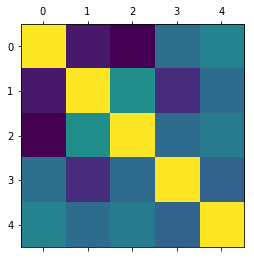

In [54]:
plt.matshow(ind_new[['ind_04', 'ind_19', 'ind_20', 'ind_22', 'ind_36']].corr())

#### Factor de Infación de la Varianza

Para decidir con cuál de las variables correlacionadas me voy a quedar tengo que calcular VIF.

VIF = 1 / (1-R^2)

* VIF = 1 : Las variables no están correlacionadas
* VIF < 5 : Las variables tienen una correlación moderada y se pueden quedar en el modelo
* VIF > 5 : Las variables están altamente correlacionadas y deben desaparecer del modelo

In [77]:
# ind_22 ~ ind_19 + ind_20 -> R^2 VIF = 1 / (1-R^2)

lm_m1 = smf.ols(formula='ind_22~ind_20+ind_19', data=ind_new).fit()
rsquared_n1 = lm_m1.rsquared
VIF1 = 1 / (1-rsquared_n1)
VIF1 #VIF1 es el mejor

1.0889863433066536

In [78]:
# ind_19 ~ ind_22 + ind_20 -> R^2 VIF = 1 / (1-R^2)

lm_m2 = smf.ols(formula='ind_19~ind_22+ind_20', data=ind_new).fit()
rsquared_n2 = lm_m2.rsquared
VIF2 = 1 / (1-rsquared_n2)
VIF2

1.1778449370313562

In [79]:
# ind_20 ~ ind_22 + ind_19 -> R^2 VIF = 1 / (1-R^2)

lm_m3 = smf.ols(formula='ind_20~ind_22+ind_19', data=ind_new).fit()
rsquared_n3 = lm_m3.rsquared
VIF3 = 1 / (1-rsquared_n3)
VIF3

1.1123265494406145

VIF1 es el mejor

#### Validar el modelo

In [83]:
a = np.random.randn(len(ind_new))

(array([  6.,   6.,  21.,  34.,  64.,  69.,  35.,  20.,  13.,   8.]),
 array([-2.61184588, -2.07801382, -1.54418176, -1.01034971, -0.47651765,
         0.05731441,  0.59114647,  1.12497852,  1.65881058,  2.19264264,
         2.7264747 ]),
 <a list of 10 Patch objects>)

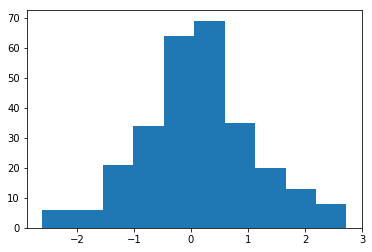

In [84]:
plt.hist(a)

In [87]:
check = (a<0.8)
training = ind_new[check]
testing = ind_new[~check]

In [88]:
len(training), len(testing)

(214, 62)

In [89]:
lm=smf.ols(formula='ind_04~ind_19+ind_20', data=training).fit()

In [90]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ind_04   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     26.63
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           4.86e-11
Time:                        16:04:22   Log-Likelihood:                 177.80
No. Observations:                 214   AIC:                            -349.6
Df Residuals:                     211   BIC:                            -339.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2534      0.009     28.003      0.000       0.236       0.271
ind_19        -0.0130      0.014     -0.957      0.340      -0.040       0.014
ind_20        -0.1991      0.031     -6.455      0.000      -0.260      -0.138
==============================================================================
Omnibus:                       38.640   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.816
Skew:                           0.896   Prob(JB):                     5.68e-17
Kurtosis:                       5.277   Cond. No.                         4.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Validación del modelo con el conunto de testing

In [99]:
ind_new.head()

,ind_04,ind_19,ind_20,ind_22,ind_36,ind_04_pred,RSE
1052,0.280971,-0.221450,0.065456,1.928504,0.260904,-4.722249e-09,0.078945
1053,0.331144,-0.103658,0.162672,0.210562,0.092525,-2.210416e-09,0.109656
1054,0.245575,-0.144514,0.123984,0.005170,0.167565,-3.081644e-09,0.060307
1055,0.212797,-0.290224,0.093475,0.777141,0.291763,-6.188799e-09,0.045283
1056,0.255142,0.014986,0.290155,0.302936,0.119666,3.195619e-10,0.065098


In [91]:
ind_04_pred = lm.predict(testing)
ind_04_pred

1052    0.243215
1053    0.222330
1054    0.230563
1055    0.238529
1057    0.227704
1062    0.201791
1065    0.217211
1072    0.243478
1075    0.189696
1080    0.221250
1086    0.268714
1087    0.190683
1102    0.230550
1106    0.216061
1110    0.255354
1111    0.212456
1114    0.180007
1117    0.243970
1119    0.285885
1127    0.252795
1128    0.260595
1134    0.200598
1139    0.188847
1143    0.195723
1152    0.201258
1159    0.231600
1162    0.212001
1169    0.248937
1173    0.202669
1175    0.230199
          ...   
1179    0.232769
1182    0.215771
1183    0.232012
1189    0.220554
1191    0.214354
1192    0.253265
1215    0.246596
1219    0.220864
1220    0.373198
1232    0.267229
1235    0.222008
1237    0.200975
1244    0.192542
1248    0.255180
1261    0.234258
1263    0.213458
1269    0.329951
1279    0.181359
1281    0.207176
1289    0.311071
1290    0.327833
1294    0.241339
1298    0.206503
1301    0.198790
1302    0.250529
1304    0.420497
1310    0.191997
1314    0.1741

In [92]:
SSD = sum((testing['ind_04'] - ind_04_pred)**2)
SSD

0.64911220049829343

In [96]:
#RSE = np.sqrt(SSD/len(testing)-2-1)
RSE = np.sqrt(SSD/len(testing))
RSE

0.10232082691681209

In [95]:
SSD/len(testing)-2-1

-2.9895304483790595

In [98]:
# Obtengo el % sin explicar

ind_04_mean = np.mean(testing['ind_04'])
error = RSE/ind_04_mean
error

0.4503382672749357